In [1]:
import pandas as pd
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('headbrain.csv')

In [3]:
X = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [4]:
X = X.reshape((X.shape[0],1))
y = y.reshape(y.shape[0],1)

In [5]:
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

In [27]:
def gradientDescent(X,y,epochs,alpha):
    slope = 0
    intercept = 0
    n = len(X)
    for i in range(epochs):
        y_pred = X * slope + intercept
        loss = y_pred - y
        intercept_grad = (2/n) * sum(loss)
        slope_grad = (2/n) * loss.T.dot(X)
        intercept = intercept - alpha * intercept_grad
        slope = slope - alpha * slope_grad
        
    return intercept,slope

In [28]:
epochs = 50000
alpha = 0.0003
intercept,slope = gradientDescent(X,y,epochs,alpha)

In [29]:
intercept,slope

(array([-3.20714201e-16]), array([[0.79956971]]))

In [30]:
predictions = []
for i in range(len(X)):
    y_pred = X[i] * slope + intercept
    predictions.append(y_pred[0])

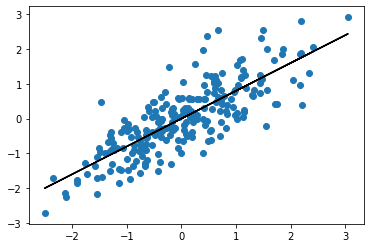

In [31]:
plt.scatter(X,y)
plt.plot(X,predictions,c='black')